FONTE: https://www.kaggle.com/zalando-research/fashionmnist

### Dataset
Fashion-MNIST é um conjunto de dados das imagens dos artigos de Zalando - consistindo em um conjunto de treinamento de 60.000 exemplos e um conjunto de testes de 10.000 exemplos. Cada exemplo é uma imagem em escala de cinza de 28 x 28, associada a um rótulo de 10 classes. Zalando pretende que o Fashion-MNIST sirva como substituto direto do conjunto de dados MNIST original para algoritmos de aprendizado de máquina de benchmarking. Ele compartilha o mesmo tamanho de imagem e estrutura de divisões de treinamento e teste.

O conjunto de dados MNIST original contém muitos dígitos manuscritos. Os membros da comunidade de AI / ML / Ciência de dados amam esse conjunto de dados e o usam como referência para validar seus algoritmos. De fato, o MNIST é frequentemente o primeiro grupo de dados que os pesquisadores tentam. "Se não funcionar no MNIST, não funcionará", disseram eles. "Bem, se funcionar no MNIST, ainda poderá falhar nos outros."

Zalando procura substituir o conjunto de dados MNIST original

### Conteúdo
Cada imagem tem 28 pixels de altura e 28 pixels de largura, totalizando 784 pixels no total. Cada pixel tem um único valor de pixel associado, indicando a claridade ou a escuridão desse pixel, com números mais altos significando mais escuros. Esse valor de pixel é um número inteiro entre 0 e 255. Os conjuntos de dados de treinamento e teste possuem 785 colunas. A primeira coluna consiste nos rótulos das classes (veja acima) e representa o artigo de vestuário. O restante das colunas contém os valores de pixel da imagem associada.

Para localizar um pixel na imagem, suponha que decompusemos x como x = i * 28 + j, onde i e j são números inteiros entre 0 e 27. O pixel está localizado na linha i e na coluna j de uma matriz 28 x 28 .
Por exemplo, pixel31 indica o pixel que está na quarta coluna da esquerda e a segunda linha da parte superior, como no diagrama ascii abaixo.

Cada exemplo de treinamento e teste é atribuído a um dos seguintes rótulos:

0 Camiseta / top

1 calça

2 Pulôver

3 Vestido

4 Casaco

5 Sandália

6 Camisa

7 Sapatilha

8 Bag

9 Bota no tornozelo

TL; DR

Cada linha é uma imagem separada.
A coluna 1 é o rótulo da classe.
As colunas restantes são números de pixels (784 no total).
Cada valor é a "escuridão" do pixel (1 a 255)

In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from time import time

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataTrain = pd.read_csv('/content/drive/MyDrive/Datasets/Fashionmnist/fashion-mnist_train.csv')
dataTest = pd.read_csv('/content/drive/MyDrive/Datasets/Fashionmnist/fashion-mnist_test.csv')

In [4]:
dataTrain.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
dataTest.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

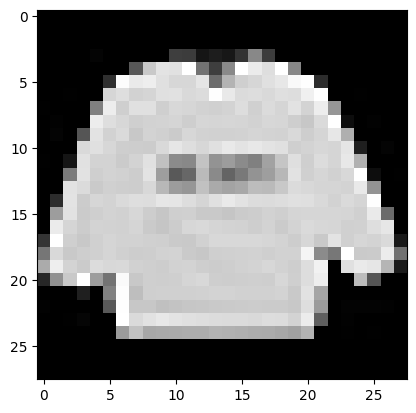

In [7]:
#Imprimindo um objeto do dataset
plt.imshow(dataTrain.values[0][1:].reshape(28,28), cmap='gray', interpolation='none')
plt.show()
#dataTrain.columns

In [ ]:
#dataTest.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [8]:
targetTrain = dataTrain["label"].values.reshape(dataTrain.shape[0], 1)
dataTrain.drop("label", axis=1, inplace=True)
trainTrain = dataTrain.values
print(trainTrain.shape)

(60000, 784)


In [9]:
trainTrain = trainTrain.astype("float32") / 255

In [10]:
enc = OneHotEncoder()
enc.fit(targetTrain)
target1 = enc.transform(targetTrain).toarray()
print(target1[:5])

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [11]:
train_x, val_x, train_y, val_y = train_test_split(trainTrain, target1, test_size=0.2, random_state=25)

### A atividade consiste em utilizar o KNN para classificar as imagens do fmnist

In [12]:
kVals = range(1, 31, 1)
accuracies = []

In [ ]:
for k in kVals:
        # train the k-Nearest Neighbor classifier with the current value of `k`
        model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        model.fit(train_x, train_y)
        # evaluate the model and update the accuracies list
        score = model.score(val_x, val_y)
        print("k=%d, accuracy=%.2f%%" % (k, score * 100))
        accuracies.append(score)

k=1, accuracy=84.92%
k=2, accuracy=76.72%
k=3, accuracy=84.51%
k=4, accuracy=79.78%
k=5, accuracy=83.79%
k=6, accuracy=80.52%
k=7, accuracy=83.60%
k=8, accuracy=81.03%
k=9, accuracy=83.18%
k=10, accuracy=81.06%
k=11, accuracy=82.97%
k=12, accuracy=80.92%
k=13, accuracy=82.53%
k=14, accuracy=80.73%
k=15, accuracy=82.06%
k=16, accuracy=80.62%
k=17, accuracy=81.74%
k=18, accuracy=80.60%
k=19, accuracy=81.61%
k=20, accuracy=80.42%
k=21, accuracy=81.48%
k=22, accuracy=80.33%
k=23, accuracy=81.29%
k=24, accuracy=80.34%
k=25, accuracy=81.08%
k=26, accuracy=80.13%
k=27, accuracy=80.88%
k=28, accuracy=80.06%
k=29, accuracy=80.73%
k=30, accuracy=79.96%


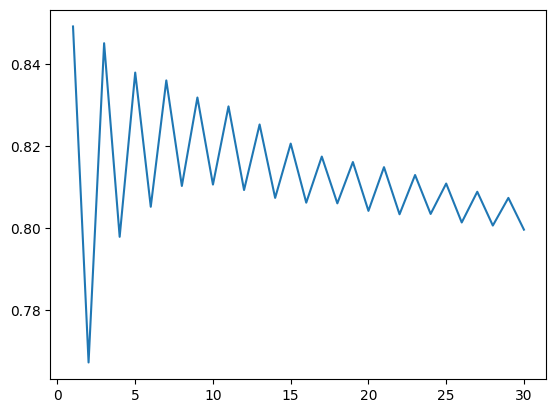

In [ ]:
plt.plot(kVals, accuracies)

In [ ]:
model.predict(val_x[0:1,:])

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
val_x[0:1,:]

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 3.0757405e-05, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 2.7681663e-04, 1.7224145e-03, 2.1683970e-03,
        1.3225683e-03, 7.6893502e-04, 8.4582856e-04, 1.7685506e-03,
        2.1222609e-03, 9.6885813e-04, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        3.0757405e-05, 0.0000000e+00, 0.0000000e+00, 1.5071126e-03,
        3.3217994e-03, 3.5063438e-03, 3.6447521e-03, 3.8292964e-03,
        3.9215689e-03, 3.9215689e-03, 3.7985391e-03, 3.9215689e-03,
        3.8446751e-03, 3.6139947e-03, 3.3064208e-03, 2.8450596e-03,
        5.5363326e-04, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e

In [ ]:
val_y[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
model = KNeighborsClassifier(n_neighbors=29, metric='euclidean')
model.fit(train_x, train_y)
# evaluate the model and update the accuracies list
score = model.score(val_x, val_y)
print("k=%d, accuracy=%.2f%%" % (29, score * 100))

k=29, accuracy=80.73%
